# Ethereum Classification Model.

Importing Packages.

In [1]:
# IMPORT THE LIBRARY
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Importing the required libraries
#import numpy as np
#import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn import datasets
#from sklearn import svm
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#import pandas as pd
#import numpy as np
#import lightgbm as lgb
import matplotlib.pyplot as plt
#from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pandas.tseries.holiday import USFederalHolidayCalendar
#from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set random seed for reproducibility
np.random.seed(42)
cal = USFederalHolidayCalendar()

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Getting the Ethereum data from Yahoo Finance.

End date.

In [2]:
end_date = datetime.today()

Choosing the ticker to use.

In [3]:
eth = yf.Ticker("ETH-USD")

Retrieving the historical data.

In [4]:
eth_hist = eth.history(start='2020-01-01',end=end_date)

Viewing the data.

In [5]:
eth_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,2505.590576,2587.430176,2470.268311,2565.348145,18971841402,0.0,0.0
2024-10-29 00:00:00+00:00,2565.417969,2680.054443,2560.153809,2637.957520,22185845095,0.0,0.0
2024-10-30 00:00:00+00:00,2637.640137,2720.271484,2600.609619,2657.372559,22382690746,0.0,0.0


Dataframe to hold the historical data.

In [6]:
DF = eth_hist.reset_index().copy()

Viewing the data.

In [7]:
DF

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
1,2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2,2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
3,2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
4,2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...,...
1762,2024-10-28 00:00:00+00:00,2505.590576,2587.430176,2470.268311,2565.348145,18971841402,0.0,0.0
1763,2024-10-29 00:00:00+00:00,2565.417969,2680.054443,2560.153809,2637.957520,22185845095,0.0,0.0
1764,2024-10-30 00:00:00+00:00,2637.640137,2720.271484,2600.609619,2657.372559,22382690746,0.0,0.0
1765,2024-10-31 00:00:00+00:00,2657.213135,2667.559570,2501.572266,2515.799316,19760409505,0.0,0.0


We are interested in the Date and Closing price of Cryptocurrency.

In [8]:
DF = DF[['Date','Close']]

Sorting the data in chronological order.

In [9]:
DF = DF.sort_values(['Date'])

Function to transform the data

In [10]:
def data_trans(dataframe):
    DF = dataframe.reset_index().copy()
    DF = DF[['Date','Close']]
    DF = DF.sort_values(['Date'])

    return DF


Plotting the Ethereum Daily Closing Price.

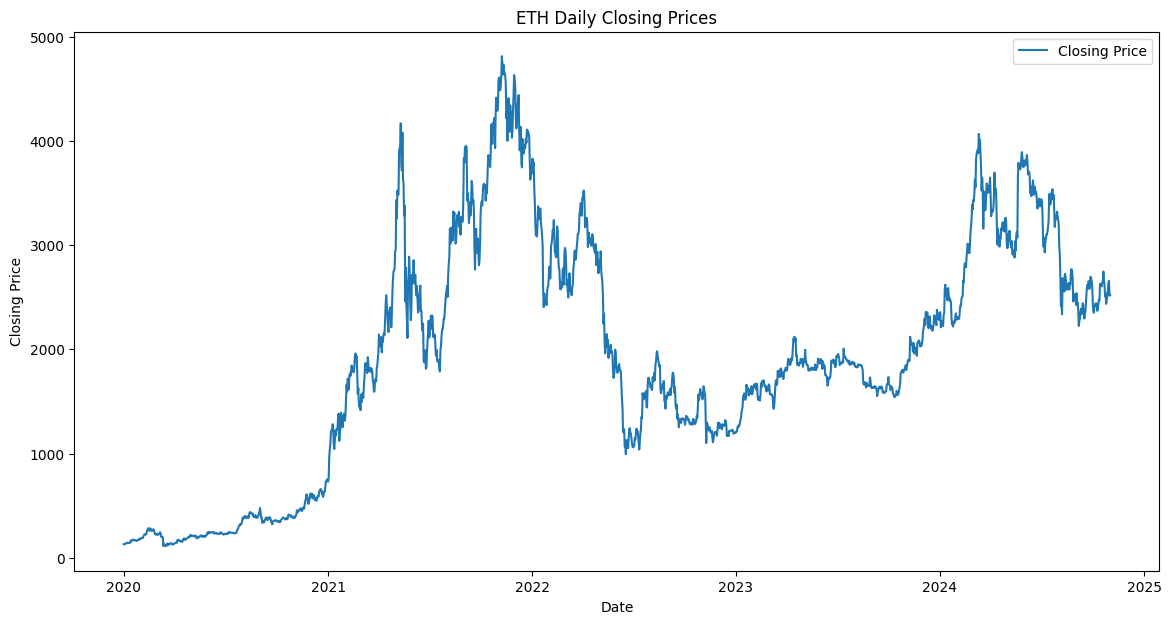

In [11]:
######################
plt.figure(figsize=(14, 7))
plt.plot(DF['Date'], DF['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ETH Daily Closing Prices')
plt.legend()
plt.show()

Feature Creation and Engineering.

In [13]:
# Feature creation and engineering
def create_date(DF, x, lag_n):
    DF1 = DF.copy()
    
    #Trend
    DF1['date'] = pd.to_datetime(DF1['Date'])
    DF1['weekday'] = DF1['Date'].dt.day_name()
  
    DF1['month'] = DF1['Date'].dt.month_name()
    dummies_wkd = pd.get_dummies(DF1['weekday'], prefix='is') + 0
    DF1 = pd.concat([DF1, dummies_wkd], axis=1)
    
    #Seasonal
    dummies_mon = pd.get_dummies(DF1['month'], prefix='is') + 0
    DF1 = pd.concat([DF1, dummies_mon], axis=1)
    
    #Event
    holidays = cal.holidays(start=DF1['Date'].min(), end=DF1['Date'].max())
    DF1['is_holiday'] = DF1['Date'].isin(holidays).astype(int)
    DF1['is_holiday'].mean()
    
    #Lagging 
    DF1['t'] = (DF1['Date'] - DF1['Date'].min()).dt.days
    DF1['t_lg'] = np.log((DF1['t'] + 1))

    for lag in range(1, lag_n + 1):
        DF1[f'lag{lag}'] = DF1[x].shift(lag)
    
    #Moving Average
    DF1['rolling_mean_7'] = DF1[x].rolling(window=7).mean()
    DF1['rolling_std_7'] = DF1[x].rolling(window=7).std()
    DF1['rolling_mean_30'] = DF1[x].rolling(window=30).mean()
    DF1['rolling_std_30'] = DF1[x].rolling(window=30).std()

    DF1 = DF1.drop(['month','weekday'], axis = 1)
    DF1 = DF1.fillna(0)
   
    return DF1

Dataframe with new features. A conversion from time series to tabular data.

In [14]:
new_DF = create_date(DF, 'Close', 3)

In [15]:
new_DF.tail()

,Date,Close,date,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,is_April,is_August,is_December,is_February,is_January,is_July,is_June,is_March,is_May,is_November,is_October,is_September,is_holiday,t,t_lg,lag1,lag2,lag3,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
1762,2024-10-28 00:00:00+00:00,2565.348145,2024-10-28 00:00:00+00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1762,7.474772,2505.940674,2479.603271,2435.934082,2521.517299,59.589653,2516.481120,108.483618
1763,2024-10-29 00:00:00+00:00,2637.957520,2024-10-29 00:00:00+00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1763,7.475339,2565.348145,2505.940674,2479.603271,2524.054443,64.654262,2515.768140,107.578807
1764,2024-10-30 00:00:00+00:00,2657.372559,2024-10-30 00:00:00+00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1764,7.475906,2637.957520,2565.348145,2505.940674,2545.236398,81.127848,2517.578467,109.537576
1765,2024-10-31 00:00:00+00:00,2515.799316,2024-10-31 00:00:00+00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1765,7.476472,2657.372559,2637.957520,2565.348145,2542.565081,81.845031,2519.807739,108.769954
1766,2024-11-01 00:00:00+00:00,2518.843018,2024-11-01 00:00:00+00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1766,7.477038,2515.799316,2657.372559,2637.957520,2554.409215,68.801934,2524.928117,104.784971


The maximum closing price for Ethereum.

In [16]:
max_y = new_DF['Close'].max()

In [17]:
max_y

4812.08740234375

Creating the percentage change in the data.

In [18]:
new_DF['pct_change'] = new_DF['Close'].pct_change()

Creating a binary variable to determine the direction of the price.

In [19]:
new_DF['price_direction'] = new_DF['pct_change'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
new_DF['pct_change'] = new_DF['pct_change'].fillna(0)

In [21]:
new_DF

,Date,Close,date,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,is_April,is_August,is_December,is_February,is_January,is_July,is_June,is_March,is_May,is_November,is_October,is_September,is_holiday,t,t_lg,lag1,lag2,lag3,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,pct_change,price_direction
0,2020-01-01 00:00:00+00:00,130.802002,2020-01-01 00:00:00+00:00,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2020-01-02 00:00:00+00:00,127.410179,2020-01-02 00:00:00+00:00,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.693147,130.802002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025931,0
2,2020-01-03 00:00:00+00:00,134.171707,2020-01-03 00:00:00+00:00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1.098612,127.410179,130.802002,0.000000,0.000000,0.000000,0.000000,0.000000,0.053069,1
3,2020-01-04 00:00:00+00:00,135.069366,2020-01-04 00:00:00+00:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1.386294,134.171707,127.410179,130.802002,0.000000,0.000000,0.000000,0.000000,0.006690,1
4,2020-01-05 00:00:00+00:00,136.276779,2020-01-05 00:00:00+00:00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1.609438,135.069366,134.171707,127.410179,0.000000,0.000000,0.000000,0.000000,0.008939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2024-10-28 00:00:00+00:00,2565.348145,2024-10-28 00:00:00+00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1762,7.474772,2505.940674,2479.603271,2435.934082,2521.517299,59.589653,2516.481120,108.483618,0.023707,1
1763,2024-10-29 00:00:00+00:00,2637.957520,2024-10-29 00:00:00+00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1763,7.475339,2565.348145,2505.940674,2479.603271,2524.054443,64.654262,2515.768140,107.578807,0.028304,1
1764,2024-10-30 00:00:00+00:00,2657.372559,2024-10-30 00:00:00+00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1764,7.475906,2637.957520,2565.348145,2505.940674,2545.236398,81.127848,2517.578467,109.537576,0.007360,1
1765,2024-10-31 00:00:00+00:00,2515.799316,2024-10-31 00:00:00+00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1765,7.476472,2657.372559,2637.957520,2565.348145,2542.565081,81.845031,2519.807739,108.769954,-0.053276,0


Using a for loop to drop columns Date, date,price direction and close from the main matrix.

In [22]:
df = new_DF.copy()
features = list(new_DF.columns)
rem = ['Date','date','price_direction','Close']
for itv in rem:
    features.remove(itv)

In [24]:
X = df[features]
y = df['price_direction']

Model Training

In [25]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Training the model on the Gaussian Naive Bayes.

In [26]:
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

In [27]:
# train the model
gnb.fit(X_train, y_train)

GaussianNB()

Making Prediction based on the Gaussian Naive Bayes.

In [28]:
# make predictions
gnb_pred = gnb.predict(X_test)

In [29]:
gnb_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [30]:
# print the accuracy
print("Accuracy of Gaussian Naive Bayes: ",
      accuracy_score(y_test, gnb_pred))
# print other performance metrics
print("Precision of Gaussian Naive Bayes: ",
      precision_score(y_test, gnb_pred, average='weighted'))

print("Recall of Gaussian Naive Bayes: ",
      recall_score(y_test, gnb_pred, average='weighted'))
print("F1-Score of Gaussian Naive Bayes: ",
      f1_score(y_test, gnb_pred, average='weighted'))

Accuracy of Gaussian Naive Bayes:  0.6384180790960452
Precision of Gaussian Naive Bayes:  0.6382382164588819
Recall of Gaussian Naive Bayes:  0.6384180790960452
F1-Score of Gaussian Naive Bayes:  0.6380015100627457


Training the model on Decision Trees.

In [31]:
# DECISION TREE CLASSIFIER
dt_cl = DecisionTreeClassifier(random_state=0)
# train the model
dt_cl.fit(X_train, y_train)
# make predictions
dt_pred = dt_cl.predict(X_test)

In [32]:
dt_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
# print the accuracy
print("Accuracy of Decision Tree Classifier: ",
      accuracy_score(y_test, dt_pred))
# print other performance metrics
print("Precision of Decision Tree Classifier: ",
      precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",
      recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ",
      f1_score(y_test, dt_pred, average='weighted'))

Accuracy of Decision Tree Classifier:  0.9981167608286252
Precision of Decision Tree Classifier:  0.998124032022337
Recall of Decision Tree Classifier:  0.9981167608286252
F1-Score of Decision Tree Classifier:  0.9981168544007454


Training the data on Support Vector Machine.

In [34]:
# SUPPORT VECTOR MACHINE
svm_clf = svm.SVC(kernel='linear')  # Linear Kernel
# train the model
svm_clf.fit(X_train, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)

In [35]:
#print the accuracy
print("Accuracy of Support Vector Machine: ",
      accuracy_score(y_test, svm_clf_pred))
# print other performance metrics
print("Precision of Support Vector Machine: ",
      precision_score(y_test, svm_clf_pred, average='weighted'))
print("Recall of Support Vector Machine: ",
      recall_score(y_test, svm_clf_pred, average='weighted'))
print("F1-Score of Support Vector Machine: ",
      f1_score(y_test, svm_clf_pred, average='weighted'))

Accuracy of Support Vector Machine:  0.6290018832391714
Precision of Support Vector Machine:  0.6312854780839157
Recall of Support Vector Machine:  0.6290018832391714
F1-Score of Support Vector Machine:  0.6251147116090983


Training the data on Random Forest Classifier.

In [36]:
# RANDOM FOREST CLASSIFIER
rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)  # Linear Kernel
# train the model
rfc_clf.fit(X_train, y_train)
# make predictions
rfc_clf_pred = rfc_clf.predict(X_test)

In [37]:
#print the accuracy
print("Accuracy of Support Vector Machine: ",
      accuracy_score(y_test, rfc_clf_pred))
# print other performance metrics
print("Precision of Support Vector Machine: ",
      precision_score(y_test, rfc_clf_pred, average='weighted'))
print("Recall of Support Vector Machine: ",
      recall_score(y_test, rfc_clf_pred, average='weighted'))
print("F1-Score of Support Vector Machine: ",
      f1_score(y_test, rfc_clf_pred, average='weighted'))

Accuracy of Support Vector Machine:  0.9981167608286252
Precision of Support Vector Machine:  0.998124032022337
Recall of Support Vector Machine:  0.9981167608286252
F1-Score of Support Vector Machine:  0.9981168544007454


https://pub.towardsai.net/a-generalized-machine-learning-framework-for-time-series-forecasting-54f839546d9e

Regressor for the predictive model.

In [38]:
X_res = df[features]
y_res = df['Close']

In [39]:
X_res

,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,is_April,is_August,is_December,is_February,is_January,is_July,is_June,is_March,is_May,is_November,is_October,is_September,is_holiday,t,t_lg,lag1,lag2,lag3,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,pct_change
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.693147,130.802002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025931
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1.098612,127.410179,130.802002,0.000000,0.000000,0.000000,0.000000,0.000000,0.053069
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1.386294,134.171707,127.410179,130.802002,0.000000,0.000000,0.000000,0.000000,0.006690
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1.609438,135.069366,134.171707,127.410179,0.000000,0.000000,0.000000,0.000000,0.008939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1762,7.474772,2505.940674,2479.603271,2435.934082,2521.517299,59.589653,2516.481120,108.483618,0.023707
1763,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1763,7.475339,2565.348145,2505.940674,2479.603271,2524.054443,64.654262,2515.768140,107.578807,0.028304
1764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1764,7.475906,2637.957520,2565.348145,2505.940674,2545.236398,81.127848,2517.578467,109.537576,0.007360
1765,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1765,7.476472,2657.372559,2637.957520,2565.348145,2542.565081,81.845031,2519.807739,108.769954,-0.053276


In [40]:
y_res

0        130.802002
1        127.410179
2        134.171707
3        135.069366
4        136.276779
           ...     
1762    2565.348145
1763    2637.957520
1764    2657.372559
1765    2515.799316
1766    2518.843018
Name: Close, Length: 1767, dtype: float64

Splitting the data into training and testing for the regressor.

In [41]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

Training the model using Decision Trees : Regressor

In [42]:
dt_rg = DecisionTreeRegressor(random_state=0)
# train the model
dt_rg.fit(X_train, y_train)
# make predictions
dt_rg_pred = dt_rg.predict(X_test)

In [43]:
dt_rg_pred

array([1874.74487305, 1627.96801758, 4087.90307617, 4216.36523438,
       1369.04052734, 1859.43286133, 1640.06762695, 1865.6361084 ,
       3481.99584961, 2233.36669922,  237.21905518, 2293.84179688,
       3834.828125  , 1417.93847656, 4217.87695312, 3248.28857422,
       1066.51281738, 2440.35229492, 1332.83557129,  204.23023987,
       1839.28015137,  384.36453247,  259.89471436, 1274.61901855,
       1647.5982666 , 2063.28613281, 2217.71020508, 2466.96142578,
       3244.51928711, 1314.29919434, 2028.42248535,  279.21542358,
       2952.05615234, 1269.37902832, 2196.48120117,  379.5128479 ,
        208.69439697, 1636.11767578, 3311.44189453, 1212.30029297,
       1761.80004883, 3277.23461914, 2973.13110352, 1872.92260742,
       3083.09790039, 1537.40515137, 2724.61987305, 2436.51342773,
       2515.79931641, 1817.62414551,  384.0010376 , 3511.80615234,
       1332.51696777,  371.05282593,  228.98982239, 2029.92919922,
       2240.68603516, 3511.08691406, 1846.03369141, 1752.04479

In [44]:
print('Mean Absolute Error:', mean_absolute_error(y_test, dt_rg_pred))
print('Mean Squared Error:', mean_squared_error(y_test, dt_rg_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dt_rg_pred)))
print('R2 score:', np.sqrt(r2_score(y_test, dt_rg_pred)))

Mean Absolute Error: 35.98414685093077
Mean Squared Error: 3878.4811186588936
Root Mean Squared Error: 62.27745273097555
R2 score: 0.9985068397330262


Training the model using the Random Forest : Regressor

In [45]:
rf_rg = RandomForestRegressor()
# train the model
rf_rg.fit(X_train, y_train)
# make predictions
rf_rg_pred = rf_rg.predict(X_test)

In [46]:
rf_rg_pred

array([1875.36782349, 1621.98855469, 4141.73946533, 4421.71658203,
       1339.65487061, 1872.171698  , 1638.04629883, 1870.35324951,
       3542.08554199, 2199.22462524,  242.1181868 , 2298.90448486,
       3678.73251709, 1358.88968872, 4116.15571777, 3314.87672607,
       1077.26879028, 2409.90809082, 1472.37928955,  178.38548737,
       1814.11041992,  393.76771362,  259.64683685, 1248.56951416,
       1636.62533691, 2052.17037354, 2284.73122314, 2529.44671875,
       3223.49571045, 1309.33157471, 2044.03473145,  264.69204224,
       2916.711604  , 1263.67832397, 2233.15508301,  386.22719086,
        207.1939418 , 1634.38268555, 3336.58144531, 1209.94355347,
       1756.65394165, 3302.54243408, 2995.75560547, 1875.63985474,
       3050.33547119, 1538.6721936 , 2690.70508789, 2452.40051025,
       2501.53494141, 1868.54305176,  396.60384155, 3489.85350586,
       1318.48204468,  375.90537506,  229.59227158, 2022.99987427,
       2249.52045898, 3467.94797607, 1812.81766724, 1749.36618

In [47]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_rg_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_rg_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_rg_pred)))
print('R2 score:', np.sqrt(r2_score(y_test, rf_rg_pred)))

Mean Absolute Error: 22.798294320977558
Mean Squared Error: 1874.2310545304879
Root Mean Squared Error: 43.29239026122822
R2 score: 0.999278726183306


The champion models have been chose based on the mean squared error for regressors. For the classifiers the accuracy was used to chose the models.

Decision Tree and Random Forest are the chose ones for both the regressor and classifier.

In [92]:
##end_date = datetime.today()
end_train_date = '2024-09-23'
start_test_date = '2024-09-23'
end_test_date = datetime.today()

In [93]:
eth_hist = eth.history(start='2020-01-01',end=end_train_date)
eth_test = eth.history(start=start_test_date,end=end_test_date)

In [94]:
eth_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-18 00:00:00+00:00,2341.732910,2369.729004,2278.664551,2369.729004,18159056422,0.0,0.0
2024-09-19 00:00:00+00:00,2369.374756,2492.204590,2369.374756,2464.752197,18437147349,0.0,0.0
2024-09-20 00:00:00+00:00,2464.782227,2571.992676,2439.377930,2561.072021,19112788620,0.0,0.0


In [108]:
eth_test.shape

(13, 7)

Transforming the Ethereum data.

In [105]:
eth_data = data_trans(eth_hist)


Forecasting the Next Day’s Price

In [46]:
def forecast_next_1_day(model, DF, features):
    # Ensure the data frame is sorted by date
    DF = DF.sort_values('Date')

    # Create the next day's date
    next_date = DF['Date'].max() + pd.Timedelta(days=1)

    # Create a new row for the next day's features
    new_row = pd.DataFrame(index=[0])

    # Fill the new row with feature values
    new_row['Date'] = next_date
    new_row['t'] = (next_date - DF['Date'].min()).days
    new_row['t_lg'] = np.log(new_row['t'] + 1)

    # Calculate lag features
    for lag in range(1, 4):  # Assuming lag_n=3 from the provided create_date function
        new_row[f'lag{lag}'] = DF['Close'].shift(lag).iloc[-1]

    # Calculate rolling statistics
    new_row['rolling_mean_7'] = DF['Close'].rolling(window=7).mean().iloc[-1]
    new_row['rolling_std_7'] = DF['Close'].rolling(window=7).std().iloc[-1]
    new_row['rolling_mean_30'] = DF['Close'].rolling(window=30).mean().iloc[-1]
    new_row['rolling_std_30'] = DF['Close'].rolling(window=30).std().iloc[-1]

    # Extract day of the week and month for dummy variables
    new_row['weekday'] = next_date.day_name()
    new_row['month'] = next_date.month_name()

    dummies_wkd = pd.get_dummies(new_row['weekday'], prefix='is')
    new_row = pd.concat([new_row, dummies_wkd], axis=1)

    dummies_mon = pd.get_dummies(new_row['month'], prefix='is')
    new_row = pd.concat([new_row, dummies_mon], axis=1)

    holidays = cal.holidays(start=DF['Date'].min(), end=DF['Date'].max())
    new_row['is_holiday'] = next_date in holidays

    # Fill missing dummy variables with 0 if they do not exist
    missing_columns = set(features) - set(new_row.columns)
    for col in missing_columns:
        new_row[col] = 0

    # Ensure the new row contains only the required features
    new_row = new_row[features + ['Date']]

    # Predict the sales for the next day
    price_prediction = model.predict(new_row[features])[0]

    return price_prediction, new_row

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-02 00:00:00+00:00,2448.877197,2498.121338,2354.539307,2365.231689,20148256472,0.0,0.0
2024-10-03 00:00:00+00:00,2365.213623,2402.862549,2311.027832,2349.791260,18051447791,0.0,0.0
2024-10-04 00:00:00+00:00,2349.732910,2440.242432,2339.870850,2414.793945,14879264082,0.0,0.0


Decision Tree next day prediction.

In [50]:
dt_price_prediction, dt_new_row = forecast_next_1_day(dt_rg, DF, features)

In [107]:
price_prediction #2648.546387

2695.900634765625

Forecasting the Next 7 Days’ Sales

In [68]:
def forecast_next_7_days(model, DF, features):
    predictions = []
    for _ in range(5):
        sales_prediction, new_row = forecast_next_1_day(model, DF, features)
        predictions.append(sales_prediction)

        # Append the prediction to the DataFrame to update lags and rolling stats for the next iteration
        new_row['Close'] = sales_prediction
        DF = pd.concat([DF, new_row[['Date', 'Close'] + features]], ignore_index=True)

    return predictions, DF

In [60]:
dt5_predictions, dt5_DF = forecast_next_7_days(dt_rg, DF, features)

In [61]:
dt5_predictions

[2415.6318359375,
 2415.6318359375,
 2415.6318359375,
 2415.6318359375,
 2415.6318359375,
 2415.6318359375,
 2415.6318359375]

Random Forest 

In [62]:
rf_price_prediction, rf_new_row = forecast_next_1_day(rf_rg, DF, features)

In [63]:
rf_price_prediction

2430.7003149414063

In [69]:
rf5_predictions, rf5_DF = forecast_next_7_days(rf_rg, DF, features)

In [70]:
rf5_predictions

[2430.7003149414063,
 2446.512060546875,
 2435.972919921875,
 2445.9211694335936,
 2439.916330566406]

Classifier for the upward and downward directions.

Decision Tree.

One Day Forecast.

In [71]:
dtc_price_prediction, dtc_new_row = forecast_next_1_day(dt_cl, DF, features)

In [72]:
dtc_price_prediction

0

7 day forecast.

In [73]:
dtc_price_prediction, dtc_DF = forecast_next_7_days(dt_cl, DF, features)

In [74]:
dtc_price_prediction

[0, 0, 0, 0, 0]

In [ ]:
rfc_clf

In [75]:
rfc_price_prediction, rfc_DF = forecast_next_7_days(rfc_clf, DF, features)

In [76]:
rfc_price_prediction

[0, 0, 0, 0, 0]